In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')




Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix





Data = pd.read_excel(r'/content/gdrive/My Drive/innercity.xlsx')




In [ ]:
house_df = display(pd.DataFrame(Data))







cid         dayhours    price  room_bed  room_bath  \
0      3876100940  20150427T000000   600000       4.0       1.75   
1      3145600250  20150317T000000   190000       2.0       1.00   
2      7129303070  20140820T000000   735000       4.0       2.75   
3      7338220280  20141010T000000   257000       3.0       2.50   
4      7950300670  20150218T000000   450000       2.0       1.00   
...           ...              ...      ...       ...        ...   
21608   203600600  20150310T000000   685530       4.0       2.50   
21609   625049281  20140521T000000   535000       2.0       1.00   
21610   424069018  20140905T000000   998000       3.0       3.75   
21611  7258200055  20150206T000000   262000       4.0       2.50   
21612  8805900430  20141229T000000  1150000       4.0       2.50   

       living_measure  lot_measure ceil coast  sight  ... basement  yr_built  \
0              3050.0       9440.0    1     0    0.0  ...   1250.0      1966   
1               670.0       3101.0    1     0    0.0  ...      0.0      1948   
2              3040.0       2415.0    2     1    4.0  ...      0.0      1966   
3              1740.0       3721.0    2     0    0.0  ...      0.0      2009   
4              1120.0       4590.0    1     0    0.0  ...      0.0      1924   
...               ...          ...  ...   ...    ...  ...      ...       ...   
21608          3130.0      60467.0    2     0    0.0  ...      0.0      1996   
21609          1030.0       4841.0    1     0    0.0  ...    110.0      1939   
21610          3710.0      34412.0    2     0    0.0  ...    800.0      1978   
21611          1560.0       7800.0    2     0    0.0  ...      0.0      1997   
21612          1940.0       4875.0    2     0    0.0  ...      0.0      1925   

       yr_renovated  zipcode      lat     long  living_measure15  \
0                 0    98034  47.7228 -122.183            2020.0   
1                 0    98118  47.5546 -122.274            1660.0   
2                 0    98118  47.5188 -122.256            2620.0   
3                 0    98002  47.3363 -122.213            2030.0   
4                 0    98118  47.5663 -122.285            1120.0   
...             ...      ...      ...      ...               ...   
21608             0    98014  47.6618 -121.962            2780.0   
21609             0    98103  47.6860 -122.341            1530.0   
21610             0    98075  47.5888  -122.04            2390.0   
21611             0    98168  47.5140 -122.316            1160.0   
21612             0    98112  47.6427 -122.304            1790.0   

       lot_measure15 furnished  total_area  
0             8660.0       0.0       12490  
1             4100.0       0.0        3771  
2             2433.0       0.0        5455  
3             3794.0       0.0        5461  
4             5100.0       0.0        5710  
...              ...       ...         ...  
21608        44224.0       1.0       63597  
21609         4944.0       0.0        5871  
21610        34412.0       1.0       38122  
21611         7800.0       0.0        9360  
21612         4875.0       1.0        6815  

[21613 rows x 23 columns]

cid         dayhours    price  room_bed  room_bath  \
0      3876100940  20150427T000000   600000       4.0       1.75   
1      3145600250  20150317T000000   190000       2.0       1.00   
2      7129303070  20140820T000000   735000       4.0       2.75   
3      7338220280  20141010T000000   257000       3.0       2.50   
4      7950300670  20150218T000000   450000       2.0       1.00   
...           ...              ...      ...       ...        ...   
21608   203600600  20150310T000000   685530       4.0       2.50   
21609   625049281  20140521T000000   535000       2.0       1.00   
21610   424069018  20140905T000000   998000       3.0       3.75   
21611  7258200055  20150206T000000   262000       4.0       2.50   
21612  8805900430  20141229T000000  1150000       4.0       2.50   

       living_measure  lot_measure ceil coast  sight  ... basement  yr_built  \
0              3050.0       9440.0    1     0    0.0  ...   1250.0      1966   
1               670.0       3101.0    1     0    0.0  ...      0.0      1948   
2              3040.0       2415.0    2     1    4.0  ...      0.0      1966   
3              1740.0       3721.0    2     0    0.0  ...      0.0      2009   
4              1120.0       4590.0    1     0    0.0  ...      0.0      1924   
...               ...          ...  ...   ...    ...  ...      ...       ...   
21608          3130.0      60467.0    2     0    0.0  ...      0.0      1996   
21609          1030.0       4841.0    1     0    0.0  ...    110.0      1939   
21610          3710.0      34412.0    2     0    0.0  ...    800.0      1978   
21611          1560.0       7800.0    2     0    0.0  ...      0.0      1997   
21612          1940.0       4875.0    2     0    0.0  ...      0.0      1925   

       yr_renovated  zipcode      lat     long  living_measure15  \
0                 0    98034  47.7228 -122.183            2020.0   
1                 0    98118  47.5546 -122.274            1660.0   
2                 0    98118  47.5188 -122.256            2620.0   
3                 0    98002  47.3363 -122.213            2030.0   
4                 0    98118  47.5663 -122.285            1120.0   
...             ...      ...      ...      ...               ...   
21608             0    98014  47.6618 -121.962            2780.0   
21609             0    98103  47.6860 -122.341            1530.0   
21610             0    98075  47.5888  -122.04            2390.0   
21611             0    98168  47.5140 -122.316            1160.0   
21612             0    98112  47.6427 -122.304            1790.0   

       lot_measure15 furnished  total_area  
0             8660.0       0.0       12490  
1             4100.0       0.0        3771  
2             2433.0       0.0        5455  
3             3794.0       0.0        5461  
4             5100.0       0.0        5710  
...              ...       ...         ...  
21608        44224.0       1.0       63597  
21609         4944.0       0.0        5871  
21610        34412.0       1.0       38122  
21611         7800.0       0.0        9360  
21612         4875.0       1.0        6815  

[21613 rows x 23 columns]

In [ ]:
house_df = display(pd.DataFrame(Data))







cid         dayhours    price  room_bed  room_bath  \
0      3876100940  20150427T000000   600000       4.0       1.75   
1      3145600250  20150317T000000   190000       2.0       1.00   
2      7129303070  20140820T000000   735000       4.0       2.75   
3      7338220280  20141010T000000   257000       3.0       2.50   
4      7950300670  20150218T000000   450000       2.0       1.00   
...           ...              ...      ...       ...        ...   
21608   203600600  20150310T000000   685530       4.0       2.50   
21609   625049281  20140521T000000   535000       2.0       1.00   
21610   424069018  20140905T000000   998000       3.0       3.75   
21611  7258200055  20150206T000000   262000       4.0       2.50   
21612  8805900430  20141229T000000  1150000       4.0       2.50   

       living_measure  lot_measure ceil coast  sight  ... basement  yr_built  \
0              3050.0       9440.0    1     0    0.0  ...   1250.0      1966   
1               670.0       3101.0    1     0    0.0  ...      0.0      1948   
2              3040.0       2415.0    2     1    4.0  ...      0.0      1966   
3              1740.0       3721.0    2     0    0.0  ...      0.0      2009   
4              1120.0       4590.0    1     0    0.0  ...      0.0      1924   
...               ...          ...  ...   ...    ...  ...      ...       ...   
21608          3130.0      60467.0    2     0    0.0  ...      0.0      1996   
21609          1030.0       4841.0    1     0    0.0  ...    110.0      1939   
21610          3710.0      34412.0    2     0    0.0  ...    800.0      1978   
21611          1560.0       7800.0    2     0    0.0  ...      0.0      1997   
21612          1940.0       4875.0    2     0    0.0  ...      0.0      1925   

       yr_renovated  zipcode      lat     long  living_measure15  \
0                 0    98034  47.7228 -122.183            2020.0   
1                 0    98118  47.5546 -122.274            1660.0   
2                 0    98118  47.5188 -122.256            2620.0   
3                 0    98002  47.3363 -122.213            2030.0   
4                 0    98118  47.5663 -122.285            1120.0   
...             ...      ...      ...      ...               ...   
21608             0    98014  47.6618 -121.962            2780.0   
21609             0    98103  47.6860 -122.341            1530.0   
21610             0    98075  47.5888  -122.04            2390.0   
21611             0    98168  47.5140 -122.316            1160.0   
21612             0    98112  47.6427 -122.304            1790.0   

       lot_measure15 furnished  total_area  
0             8660.0       0.0       12490  
1             4100.0       0.0        3771  
2             2433.0       0.0        5455  
3             3794.0       0.0        5461  
4             5100.0       0.0        5710  
...              ...       ...         ...  
21608        44224.0       1.0       63597  
21609         4944.0       0.0        5871  
21610        34412.0       1.0       38122  
21611         7800.0       0.0        9360  
21612         4875.0       1.0        6815  

[21613 rows x 23 columns]

In [ ]:
print(Data.head(5))

          cid         dayhours   price  room_bed  room_bath  living_measure  \
0  3876100940  20150427T000000  600000       4.0       1.75          3050.0   
1  3145600250  20150317T000000  190000       2.0       1.00           670.0   
2  7129303070  20140820T000000  735000       4.0       2.75          3040.0   
3  7338220280  20141010T000000  257000       3.0       2.50          1740.0   
4  7950300670  20150218T000000  450000       2.0       1.00          1120.0   

   lot_measure ceil coast  sight  ... basement  yr_built  yr_renovated  \
0       9440.0    1     0    0.0  ...   1250.0      1966             0   
1       3101.0    1     0    0.0  ...      0.0      1948             0   
2       2415.0    2     1    4.0  ...      0.0      1966             0   
3       3721.0    2     0    0.0  ...      0.0      2009             0   
4       4590.0    1     0    0.0  ...      0.0      1924             0   

   zipcode      lat     long  living_measure15  lot_measure15 furnished  \
0    

In [ ]:
Data.shape

(21613, 23)

In [ ]:
obj = (Data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (Data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (Data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 7
Integer variables: 4
Float variables: 12


<ipython-input-12-24606297b779>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Data.corr(),


<Axes: >

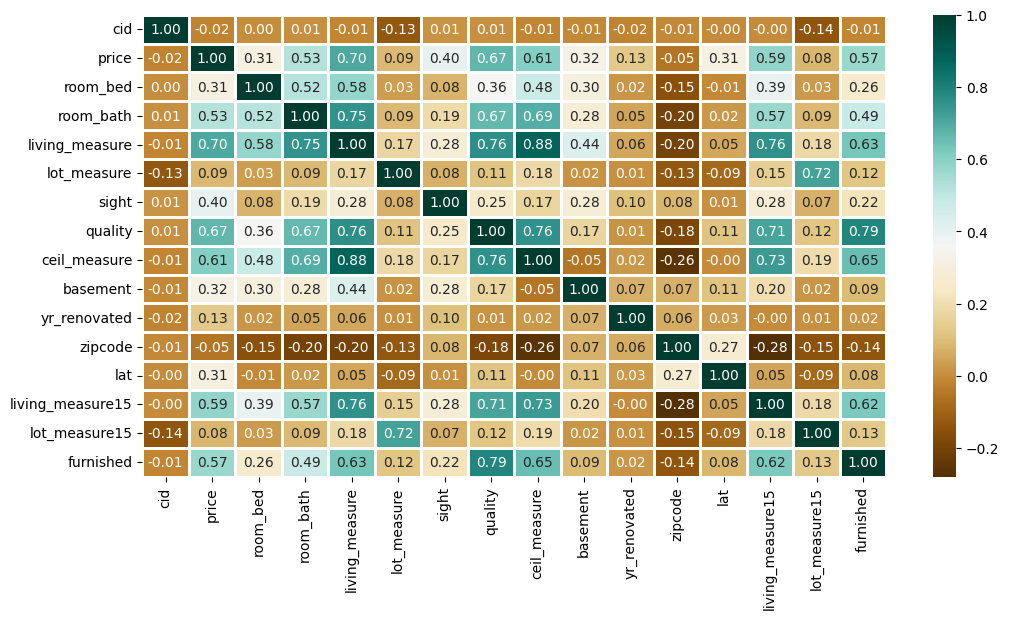

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(Data.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

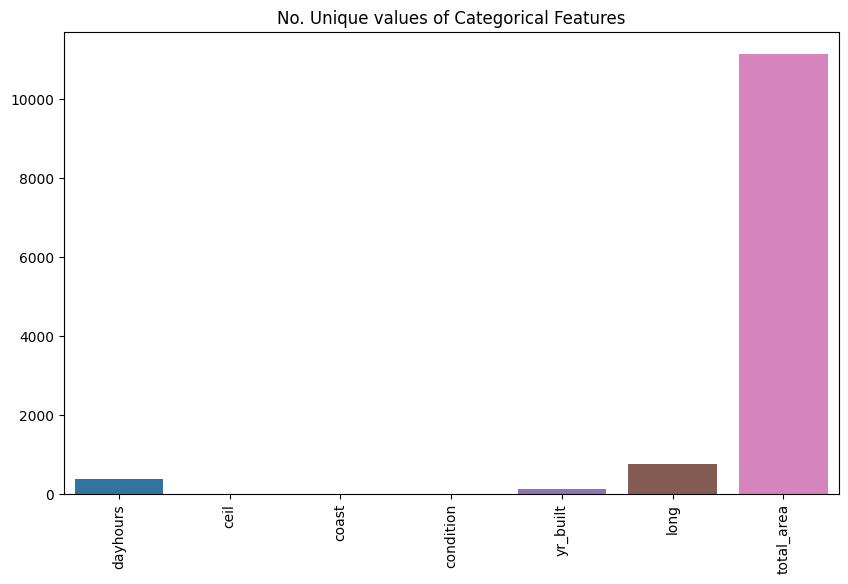

In [ ]:
unique_values = []
for col in object_cols:
  unique_values.append(Data[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

<ipython-input-15-f2e16465ac85>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11, 4, index)


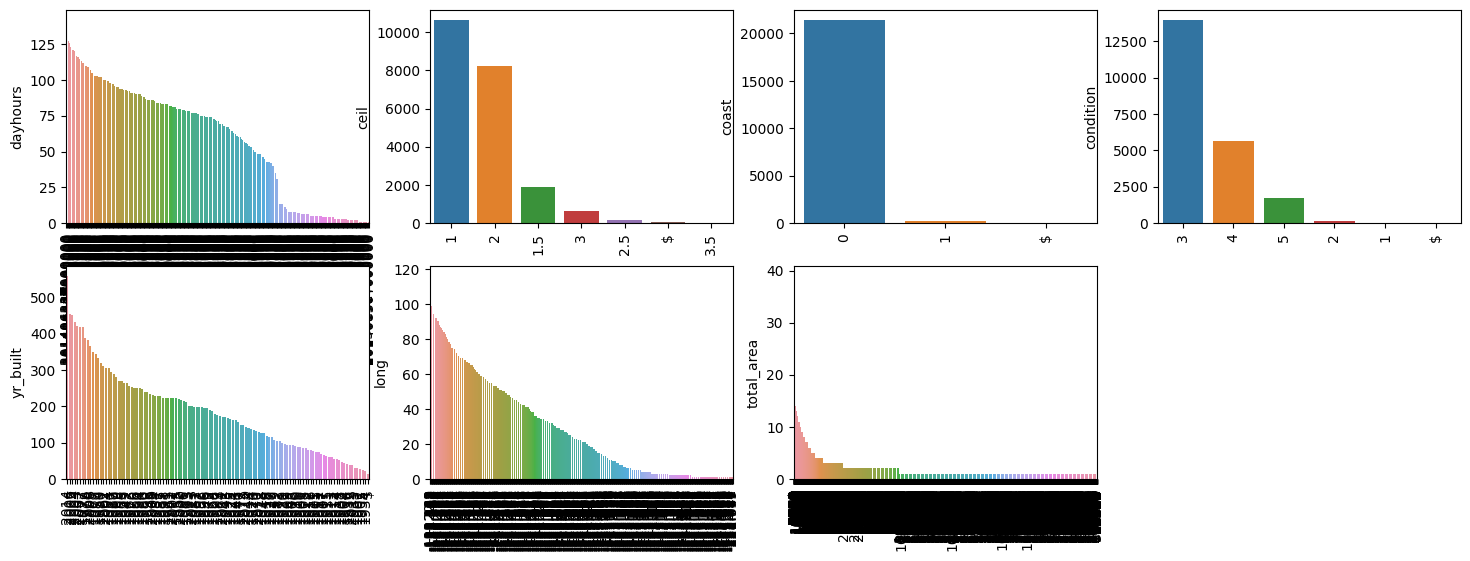

In [ ]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
    y = Data[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

In [ ]:
# Check for missing values
print(Data.isnull().sum())

# Replace missing values with mean or median
Data['room_bed'].fillna(Data['room_bed'].median(), inplace=True)
Data['room_bath'].fillna(Data ['room_bath'].median(), inplace=True)


Data['yr_built'].fillna(Data ['yr_built'].mode(), inplace=True)

Data['living_measure'].fillna(Data ['living_measure'].mean(), inplace=True)
Data['sight'].fillna(Data ['sight'].mode()[0], inplace=True)
Data['quality'].fillna(Data ['quality'].mode()[0], inplace=True)
Data['ceil_measure'].fillna(Data['ceil_measure'].mean(), inplace=True)
Data['basement'].fillna(Data ['basement'].mean(), inplace=True)
Data['yr_renovated'].fillna(Data ['yr_renovated'].mode()[0], inplace=True)
Data['lat'].fillna(Data['lat'].mean(), inplace=True)
Data['living_measure15'].fillna(Data ['living_measure15'].mean(), inplace=True)
Data['lot_measure15'].fillna(Data ['lot_measure15'].mean(), inplace=True)

# Handle incorrect data
data1 = Data[['long','condition','ceil', 'room_bed','room_bath']].fillna(0) ##  replacing blank cell with '0'

# Check for incorrect or invalid data
# Assume the 'price' column should not have negative values
invalid_data = Data[Data['price'] < 0]
print("Invalid data:\n", invalid_data)

# Drop rows with incorrect or invalid data
data = Data[Data['price'] >= 0]

# Drop rows with missing values in specific columns
Data.dropna(subset=['dayhours','total_area'], inplace=True)

# Check for duplicate rows
duplicate_rows = Data.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

# Drop duplicate rows
Data = Data.drop_duplicates()

# Reset the index if needed
Data = Data.reset_index(drop=True)

# Check if there are any remaining missing values
print(Data.isnull().sum())

# Convert dayhours to datetime (if applicable)
Data ['dayhours'] = pd.to_datetime(Data['dayhours'])

# Convert categorical variables to numerical representation (if applicable)
Data = pd.get_dummies(Data)

# Perform feature engineering (if needed)
Data['total_area'] = Data['living_measure'] + Data['lot_measure']

print(Data)



cid                   0
dayhours              0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 42
coast                 1
sight                57
condition            57
quality               1
ceil_measure          1
basement              1
yr_built              1
yr_renovated          0
zipcode               0
lat                   0
long                  0
living_measure15    166
lot_measure15        29
furnished            29
total_area           29
dtype: int64
Invalid data:
 Empty DataFrame
Columns: [cid, dayhours, price, room_bed, room_bath, living_measure, lot_measure, ceil, coast, sight, condition, quality, ceil_measure, basement, yr_built, yr_renovated, zipcode, lat, long, living_measure15, lot_measure15, furnished, total_area]
Index: []

[0 rows x 23 columns]
Number of duplicate rows: 0
cid                  0
dayhours             0
price                0
room_bed             0
room_

In [ ]:
Data.drop(['cid'],
             axis=1,
             inplace=True)

In [ ]:
print(Data.columns)


Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')


In [ ]:
Data.fillna(0 ,inplace =True)

In [ ]:
Data.where(Data != '$' ,0)

cid         dayhours    price  room_bed  room_bath  \
0      3876100940  20150427T000000   600000       4.0       1.75   
1      3145600250  20150317T000000   190000       2.0       1.00   
2      7129303070  20140820T000000   735000       4.0       2.75   
3      7338220280  20141010T000000   257000       3.0       2.50   
4      7950300670  20150218T000000   450000       2.0       1.00   
...           ...              ...      ...       ...        ...   
21608   203600600  20150310T000000   685530       4.0       2.50   
21609   625049281  20140521T000000   535000       2.0       1.00   
21610   424069018  20140905T000000   998000       3.0       3.75   
21611  7258200055  20150206T000000   262000       4.0       2.50   
21612  8805900430  20141229T000000  1150000       4.0       2.50   

       living_measure  lot_measure ceil coast  sight  ... basement  yr_built  \
0              3050.0       9440.0    1     0    0.0  ...   1250.0      1966   
1               670.0       3101.0    1     0    0.0  ...      0.0      1948   
2              3040.0       2415.0    2     1    4.0  ...      0.0      1966   
3              1740.0       3721.0    2     0    0.0  ...      0.0      2009   
4              1120.0       4590.0    1     0    0.0  ...      0.0      1924   
...               ...          ...  ...   ...    ...  ...      ...       ...   
21608          3130.0      60467.0    2     0    0.0  ...      0.0      1996   
21609          1030.0       4841.0    1     0    0.0  ...    110.0      1939   
21610          3710.0      34412.0    2     0    0.0  ...    800.0      1978   
21611          1560.0       7800.0    2     0    0.0  ...      0.0      1997   
21612          1940.0       4875.0    2     0    0.0  ...      0.0      1925   

       yr_renovated  zipcode      lat     long  living_measure15  \
0                 0    98034  47.7228 -122.183            2020.0   
1                 0    98118  47.5546 -122.274            1660.0   
2                 0    98118  47.5188 -122.256            2620.0   
3                 0    98002  47.3363 -122.213            2030.0   
4                 0    98118  47.5663 -122.285            1120.0   
...             ...      ...      ...      ...               ...   
21608             0    98014  47.6618 -121.962            2780.0   
21609             0    98103  47.6860 -122.341            1530.0   
21610             0    98075  47.5888  -122.04            2390.0   
21611             0    98168  47.5140 -122.316            1160.0   
21612             0    98112  47.6427 -122.304            1790.0   

       lot_measure15 furnished  total_area  
0             8660.0       0.0       12490  
1             4100.0       0.0        3771  
2             2433.0       0.0        5455  
3             3794.0       0.0        5461  
4             5100.0       0.0        5710  
...              ...       ...         ...  
21608        44224.0       1.0       63597  
21609         4944.0       0.0        5871  
21610        34412.0       1.0       38122  
21611         7800.0       0.0        9360  
21612         4875.0       1.0        6815  

[21613 rows x 23 columns]

In [ ]:
new_data = Data.dropna()

**Handling Outlier**

In [ ]:
# Specify the columns to check for outliers
columns_to_check = ['price', 'living_measure', 'lot_measure']

# Calculate the Z-scores for each data point in the specified columns
z_scores = np.abs((Data[columns_to_check] - Data[columns_to_check].mean()) / Data[columns_to_check].std())

# Define a threshold for outlier detection (e.g., Z-score greater than 3)
threshold = 3

# Identify outliers by checking if the Z-score exceeds the threshold
outliers = (z_scores > threshold).any(axis=1)

# Print the number of outliers
print("Number of outliers:", outliers.sum())

# Remove outliers from the dataset
Data = Data[~outliers].reset_index(drop=True)

Number of outliers: 840


In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21542 entries, 0 to 21583
Columns: 12048 entries, dayhours to total_area
dtypes: datetime64[ns](1), float64(13), int64(3), uint8(12031)
memory usage: 250.1 MB


In [ ]:

new_data.isnull().sum()

dayhours              0
price                 0
room_bed              0
room_bath             0
living_measure        0
                     ..
total_area_1077228    0
total_area_1165504    0
total_area_1652659    0
total_area_$          0
total_area            0
Length: 12048, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

s = (new_data.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
      len(object_cols))

Categorical variables:
[]
No. of. categorical features:  0


In [ ]:
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_data[object_cols]))
OH_cols.index = new_data.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_data.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['price'], axis=1)
Y = df_final['price']

# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)

**Analyzing Feature: Price (our Target)**

<Figure size 1200x600 with 0 Axes>

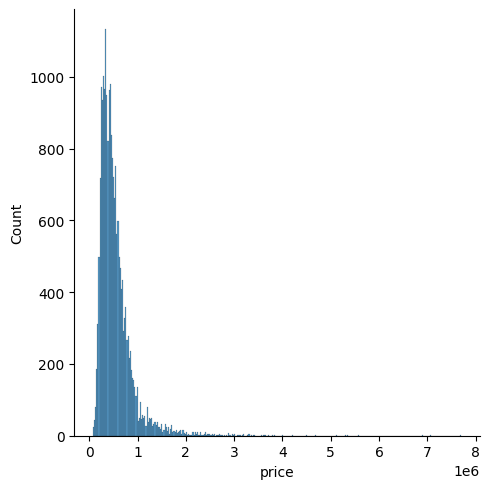

In [ ]:
# size of plots to make it uniform throughout our analysis in the notebook
plotSizeX = 12
plotSizeY = 6
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.displot(Data['price'])

**Analyzing Feature: room_bath**

In [ ]:
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.countplot(house_df.room_bath,color='green')
Data['room_bath'].value_counts().sort_index()

In [ ]:
Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [ ]:
Data.isnull().sum()

cid                   0
dayhours              0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 42
coast                 1
sight                57
condition            57
quality               1
ceil_measure          1
basement              1
yr_built              1
yr_renovated          0
zipcode               0
lat                   0
long                  0
living_measure15    166
lot_measure15        29
furnished            29
total_area           29
dtype: int64

In [ ]:
# let's check whether there's any duplicate record in our dataset or not. If present, we have to remove them
Data.duplicated().sum()

0

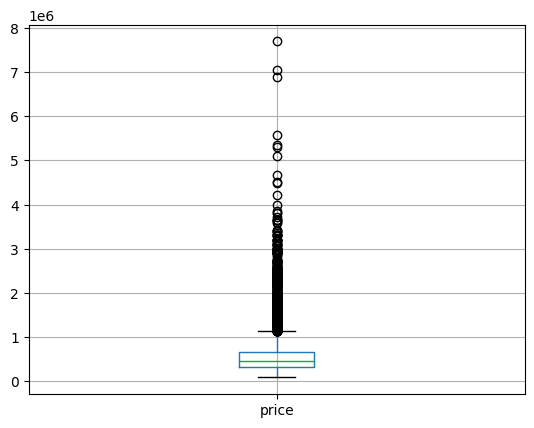

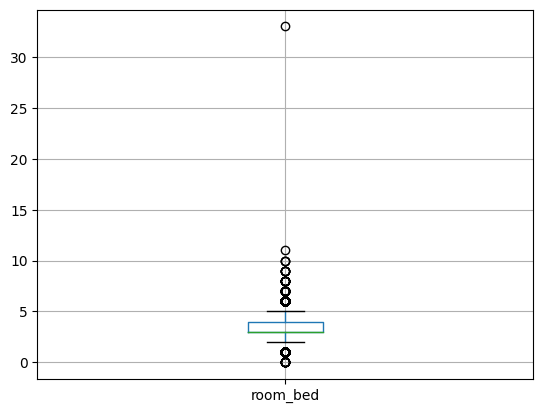

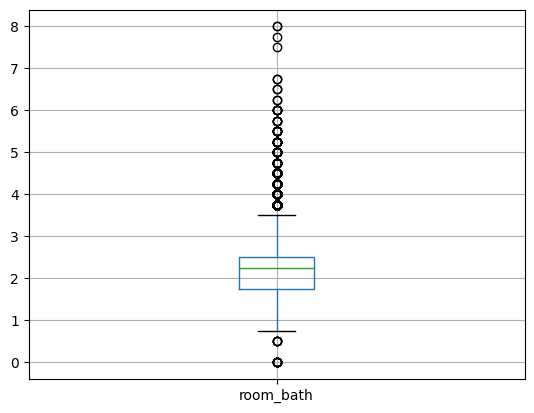

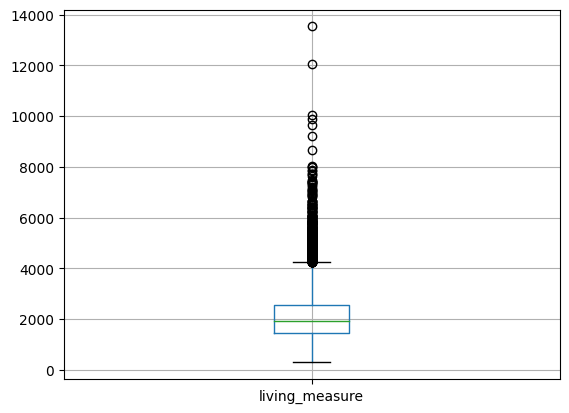

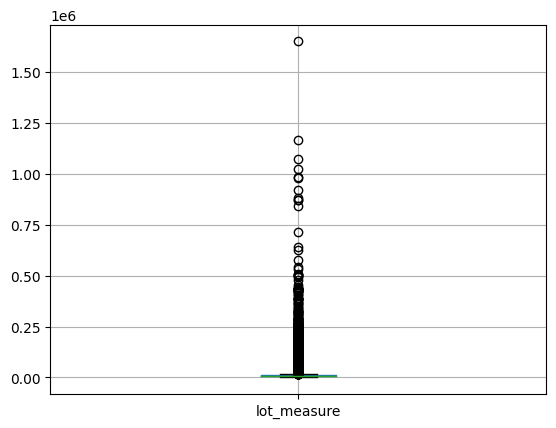

KeyError: ignored

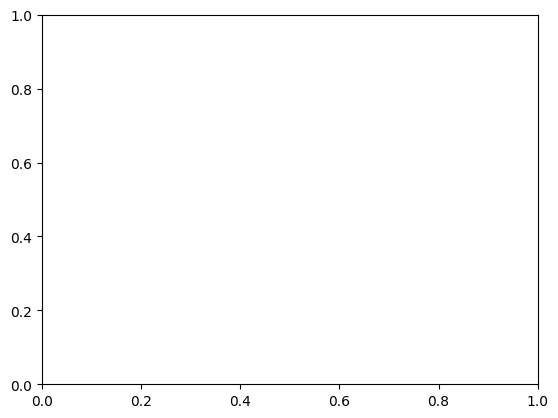

In [ ]:
#Univariate Analysis - By BoxPlot
#let's first import the required libraries for the plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# size of plots to make it uniform throughout our analysis in the notebook
plotSizeX = 6
plotSizeY = 3
# let's boxplot all the numerical columns and see if there any outliers
for i in Data.iloc[:, 2:].columns:
    Data.iloc[:, 1:].boxplot(column=i)
    plt.show()

In [ ]:
#Analyzing Feature: cid
#cid - CID is appearing muliple times, it seems data contains house which is sold multiple times
cid_count=Data.cid.value_counts()
cid_count[cid_count>1].shape

(176,)

In [ ]:
#Analyzing Feature: dayhours
#we will create new data frame that can be used for modeling
#We will convert the dayhours to 'month_year' as sale month-year is relevant for analysis

house_dfr=Data.copy()
Data.dayhours=Data.dayhours.str.replace('T000000', "")
Data.dayhours=pd.to_datetime(Data.dayhours,format='%Y%m%d')
Data['month_year']=Data['dayhours'].apply(lambda x: x.strftime('%B-%Y'))
Data['month_year'].head()

0       April-2015
1       March-2015
2      August-2014
3     October-2014
4    February-2015
Name: month_year, dtype: object

In [ ]:
Data['month_year'].value_counts()

April-2015        2231
July-2014         2211
June-2014         2180
August-2014       1940
October-2014      1878
March-2015        1875
September-2014    1774
May-2014          1768
December-2014     1471
November-2014     1411
February-2015     1250
January-2015       978
May-2015           646
Name: month_year, dtype: int64

In [ ]:
Data.groupby(['month_year'])['price'].agg('mean')

month_year
April-2015        561933.463021
August-2014       536527.039691
December-2014     524602.893270
February-2015     507919.603200
January-2015      525963.251534
July-2014         544892.161013
June-2014         558123.736239
March-2015        544057.683200
May-2014          548166.600113
May-2015          558193.095975
November-2014     522058.861800
October-2014      539127.477636
September-2014    529315.868095
Name: price, dtype: float64

In [ ]:
Data.price.describe()

count    2.161300e+04
mean     5.401822e+05
std      3.673622e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [ ]:
#Analyzing Feature: room_bed
Data['room_bed'].value_counts()

3.0     9767
4.0     6854
2.0     2747
5.0     1595
6.0      270
1.0      197
7.0       38
8.0       13
0.0       13
9.0        6
10.0       3
33.0       1
11.0       1
Name: room_bed, dtype: int64

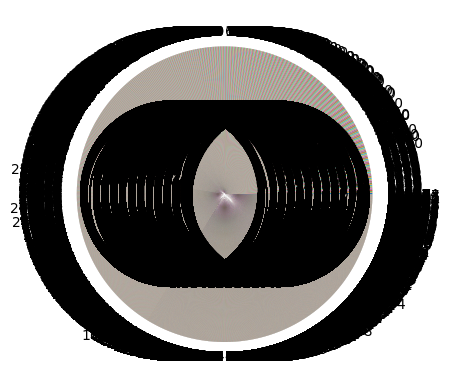

In [ ]:
x = Data['total_area'].value_counts()
plt.pie(x.values,
        labels=x.index,
        autopct='%1.10f%%')
plt.show()

In [ ]:
Data[Data['room_bed']==33]

cid   dayhours   price  room_bed  room_bath  living_measure  \
16913  2402100895 2014-06-25  640000      33.0       1.75          1620.0   

       lot_measure ceil coast  sight  ... yr_built  yr_renovated  zipcode  \
16913       6000.0    1     0    0.0  ...     1947             0    98103   

           lat     long  living_measure15  lot_measure15  furnished  \
16913  47.6878 -122.331            1330.0         4700.0        0.0   

      total_area  month_year  
16913       7620   June-2014  

[1 rows x 24 columns]

No charts were generated by quickchart
No charts were generated by quickchart
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

TypeError: ignored

In [ ]:
#Feature importance function
def feat_imp(model,X_data_set):
    imp_feature_1=pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_data_set.columns)
    imp_feature_1=imp_feature_1.sort_values(by="Imp",ascending=False)
    print(imp_feature_1)

    #feature importance
    plt.figure(figsize=(10,10))
    imp_feature_1[:30].plot.bar(figsize=(15,5))

    #First 20 and 30 feature importance sum
    print("\nFirst 8 feature importance:\t",(imp_feature_1[:8].sum())*100)
    print("\nFirst 12 feature importance:\t",(imp_feature_1[:12].sum())*100)

In [ ]:
#importing the necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=10)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

In [ ]:
Data.describe()

cid         price      room_bed     room_bath  living_measure  \
count  2.161300e+04  2.161300e+04  21505.000000  21505.000000    21596.000000   
mean   4.580302e+09  5.401822e+05      3.371355      2.115171     2079.860761   
std    2.876566e+09  3.673622e+05      0.930289      0.770248      918.496121   
min    1.000102e+06  7.500000e+04      0.000000      0.000000      290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000     1429.250000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000     1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000     2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000    13540.000000   

        lot_measure         sight       quality  ceil_measure      basement  \
count  2.157100e+04  21556.000000  21612.000000  21612.000000  21612.000000   
mean   1.510458e+04      0.234366      7.656857   1788.366556    291.522534   
std    4.142362e+04      0.766438      1.175484    828.102535    442.580840   
min    5.200000e+02      0.000000      1.000000    290.000000      0.000000   
25%    5.040000e+03      0.000000      7.000000   1190.000000      0.000000   
50%    7.618000e+03      0.000000      7.000000   1560.000000      0.000000   
75%    1.068450e+04      0.000000      8.000000   2210.000000    560.000000   
max    1.651359e+06      4.000000     13.000000   9410.000000   4820.000000   

       yr_renovated       zipcode           lat  living_measure15  \
count  21613.000000  21613.000000  21613.000000      21447.000000   
mean      84.402258  98077.939805     47.560053       1987.065557   
std      401.679240     53.505026      0.138564        685.519629   
min        0.000000  98001.000000     47.155900        399.000000   
25%        0.000000  98033.000000     47.471000       1490.000000   
50%        0.000000  98065.000000     47.571800       1840.000000   
75%        0.000000  98118.000000     47.678000       2360.000000   
max     2015.000000  98199.000000     47.777600       6210.000000   

       lot_measure15     furnished  
count   21584.000000  21584.000000  
mean    12766.543180      0.196720  
std     27286.987107      0.397528  
min       651.000000      0.000000  
25%      5100.000000      0.000000  
50%      7620.000000      0.000000  
75%     10087.000000      0.000000  
max    871200.000000      1.000000

In [ ]:
Data.dropna(inplace=True)  #Droping Non null values

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [ ]:
Data.fillna(0)

cid         dayhours    price  room_bed  room_bath  \
0      3876100940  20150427T000000   600000       4.0       1.75   
1      3145600250  20150317T000000   190000       2.0       1.00   
2      7129303070  20140820T000000   735000       4.0       2.75   
3      7338220280  20141010T000000   257000       3.0       2.50   
4      7950300670  20150218T000000   450000       2.0       1.00   
...           ...              ...      ...       ...        ...   
21608   203600600  20150310T000000   685530       4.0       2.50   
21609   625049281  20140521T000000   535000       2.0       1.00   
21610   424069018  20140905T000000   998000       3.0       3.75   
21611  7258200055  20150206T000000   262000       4.0       2.50   
21612  8805900430  20141229T000000  1150000       4.0       2.50   

       living_measure  lot_measure ceil coast  sight  ... basement  yr_built  \
0              3050.0       9440.0    1     0    0.0  ...   1250.0      1966   
1               670.0       3101.0    1     0    0.0  ...      0.0      1948   
2              3040.0       2415.0    2     1    4.0  ...      0.0      1966   
3              1740.0       3721.0    2     0    0.0  ...      0.0      2009   
4              1120.0       4590.0    1     0    0.0  ...      0.0      1924   
...               ...          ...  ...   ...    ...  ...      ...       ...   
21608          3130.0      60467.0    2     0    0.0  ...      0.0      1996   
21609          1030.0       4841.0    1     0    0.0  ...    110.0      1939   
21610          3710.0      34412.0    2     0    0.0  ...    800.0      1978   
21611          1560.0       7800.0    2     0    0.0  ...      0.0      1997   
21612          1940.0       4875.0    2     0    0.0  ...      0.0      1925   

       yr_renovated  zipcode      lat     long  living_measure15  \
0                 0    98034  47.7228 -122.183            2020.0   
1                 0    98118  47.5546 -122.274            1660.0   
2                 0    98118  47.5188 -122.256            2620.0   
3                 0    98002  47.3363 -122.213            2030.0   
4                 0    98118  47.5663 -122.285            1120.0   
...             ...      ...      ...      ...               ...   
21608             0    98014  47.6618 -121.962            2780.0   
21609             0    98103  47.6860 -122.341            1530.0   
21610             0    98075  47.5888  -122.04            2390.0   
21611             0    98168  47.5140 -122.316            1160.0   
21612             0    98112  47.6427 -122.304            1790.0   

       lot_measure15 furnished  total_area  
0             8660.0       0.0       12490  
1             4100.0       0.0        3771  
2             2433.0       0.0        5455  
3             3794.0       0.0        5461  
4             5100.0       0.0        5710  
...              ...       ...         ...  
21608        44224.0       1.0       63597  
21609         4944.0       0.0        5871  
21610        34412.0       1.0       38122  
21611         7800.0       0.0        9360  
21612         4875.0       1.0        6815  

[21613 rows x 23 columns]

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [ ]:
Data.replace(np.nan,0)

cid         dayhours    price  room_bed  room_bath  \
0      3876100940  20150427T000000   600000       4.0       1.75   
1      3145600250  20150317T000000   190000       2.0       1.00   
2      7129303070  20140820T000000   735000       4.0       2.75   
3      7338220280  20141010T000000   257000       3.0       2.50   
4      7950300670  20150218T000000   450000       2.0       1.00   
...           ...              ...      ...       ...        ...   
21608   203600600  20150310T000000   685530       4.0       2.50   
21609   625049281  20140521T000000   535000       2.0       1.00   
21610   424069018  20140905T000000   998000       3.0       3.75   
21611  7258200055  20150206T000000   262000       4.0       2.50   
21612  8805900430  20141229T000000  1150000       4.0       2.50   

       living_measure  lot_measure ceil coast  sight  ... basement  yr_built  \
0              3050.0       9440.0    1     0    0.0  ...   1250.0      1966   
1               670.0       3101.0    1     0    0.0  ...      0.0      1948   
2              3040.0       2415.0    2     1    4.0  ...      0.0      1966   
3              1740.0       3721.0    2     0    0.0  ...      0.0      2009   
4              1120.0       4590.0    1     0    0.0  ...      0.0      1924   
...               ...          ...  ...   ...    ...  ...      ...       ...   
21608          3130.0      60467.0    2     0    0.0  ...      0.0      1996   
21609          1030.0       4841.0    1     0    0.0  ...    110.0      1939   
21610          3710.0      34412.0    2     0    0.0  ...    800.0      1978   
21611          1560.0       7800.0    2     0    0.0  ...      0.0      1997   
21612          1940.0       4875.0    2     0    0.0  ...      0.0      1925   

       yr_renovated  zipcode      lat     long  living_measure15  \
0                 0    98034  47.7228 -122.183            2020.0   
1                 0    98118  47.5546 -122.274            1660.0   
2                 0    98118  47.5188 -122.256            2620.0   
3                 0    98002  47.3363 -122.213            2030.0   
4                 0    98118  47.5663 -122.285            1120.0   
...             ...      ...      ...      ...               ...   
21608             0    98014  47.6618 -121.962            2780.0   
21609             0    98103  47.6860 -122.341            1530.0   
21610             0    98075  47.5888  -122.04            2390.0   
21611             0    98168  47.5140 -122.316            1160.0   
21612             0    98112  47.6427 -122.304            1790.0   

       lot_measure15 furnished  total_area  
0             8660.0       0.0       12490  
1             4100.0       0.0        3771  
2             2433.0       0.0        5455  
3             3794.0       0.0        5461  
4             5100.0       0.0        5710  
...              ...       ...         ...  
21608        44224.0       1.0       63597  
21609         4944.0       0.0        5871  
21610        34412.0       1.0       38122  
21611         7800.0       0.0        9360  
21612         4875.0       1.0        6815  

[21613 rows x 23 columns]

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

<Axes: >

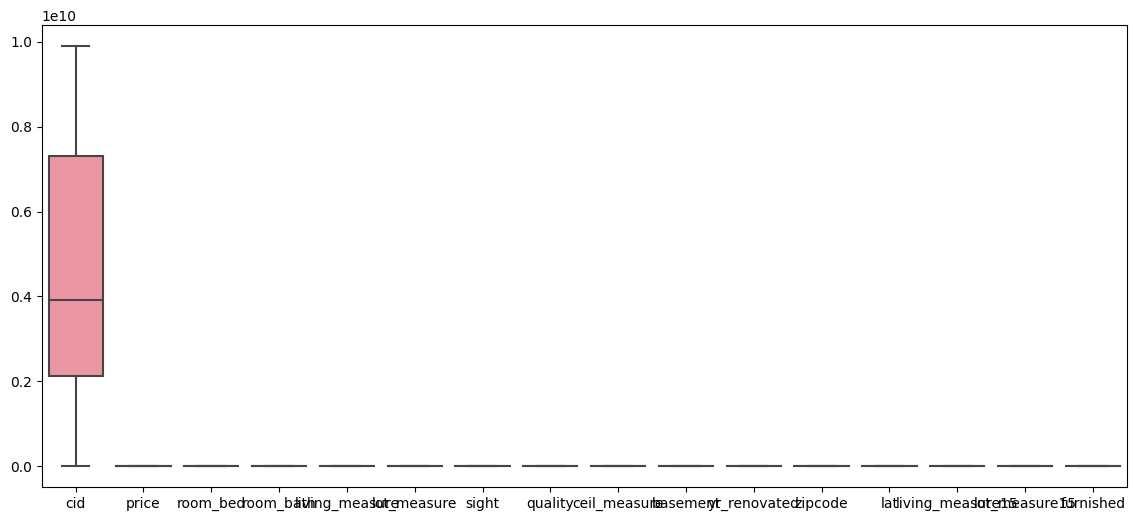

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(Data, showfliers=False)


**Multivariate Analysis**
Multivariate analysis is used for understanding the interactions between each fields in the dataset more than two. In this method, we will be using pairplot and 3D scatter plot. Here is the code in python:

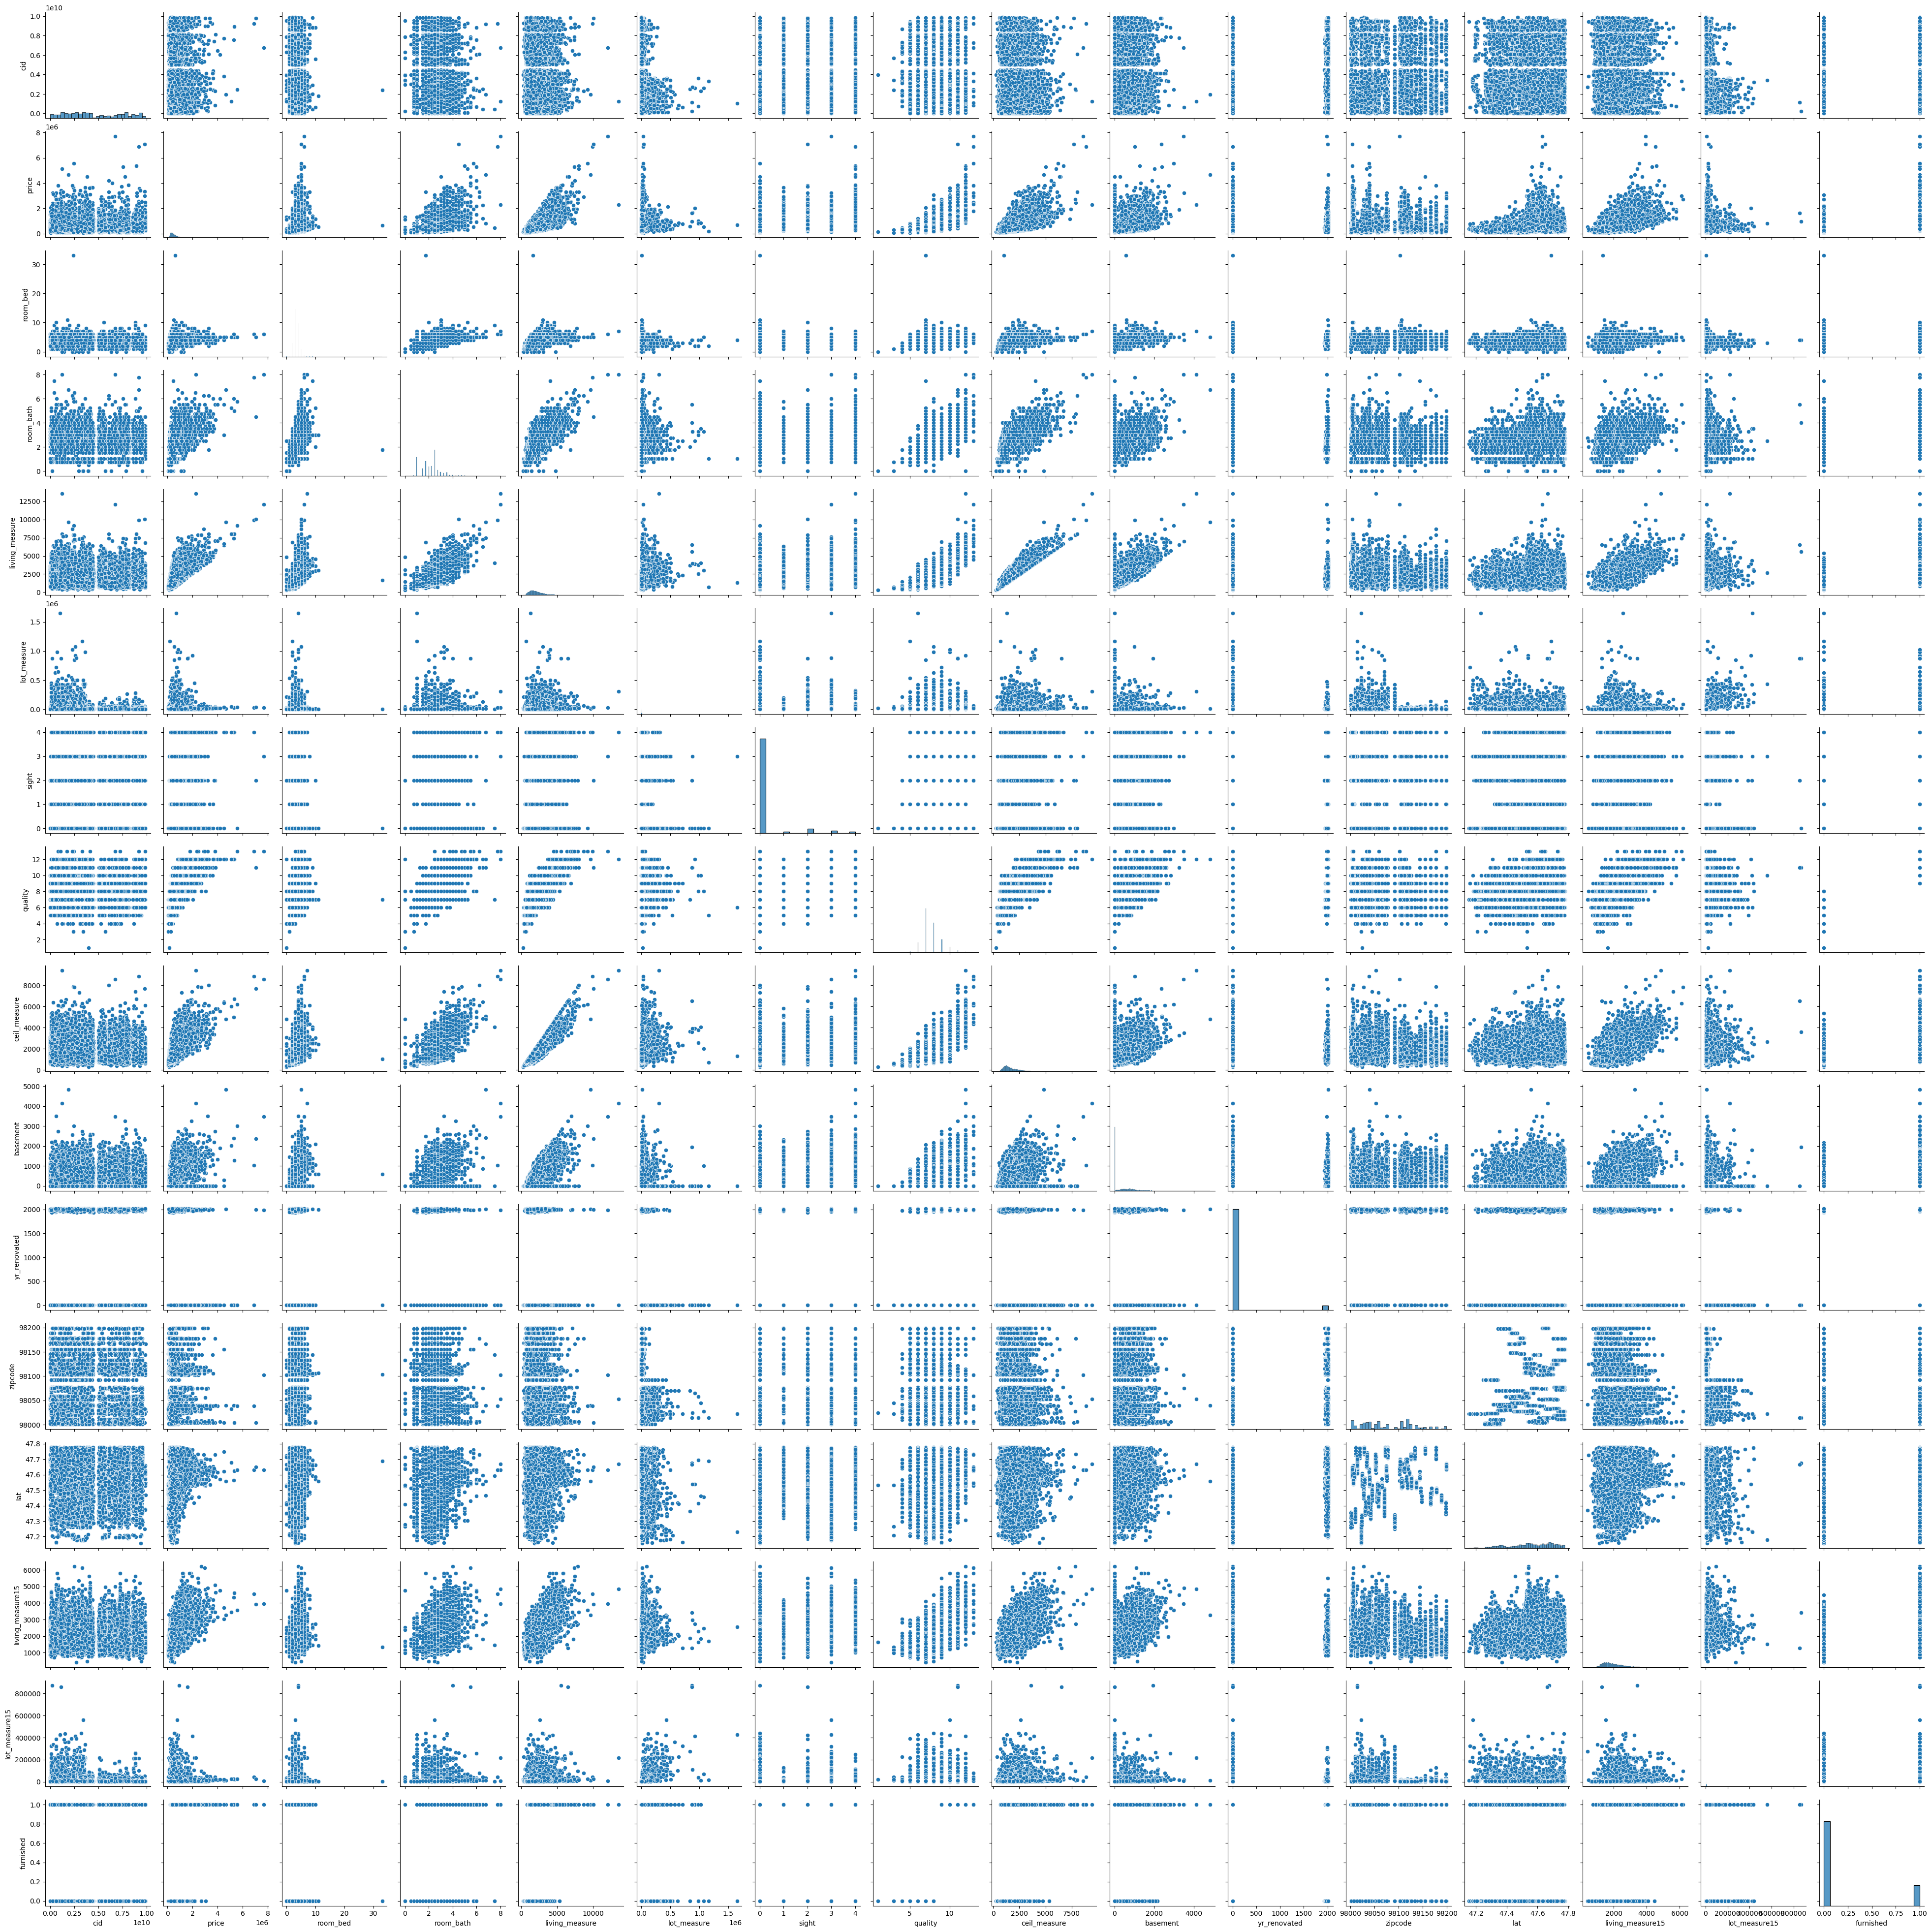

In [ ]:
sns.pairplot(Data)
plt.show()

<ipython-input-28-8c0e2d4d1021>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Data.corr(), vmin=-1, vmax=1, cmap="coolwarm", annot=True)


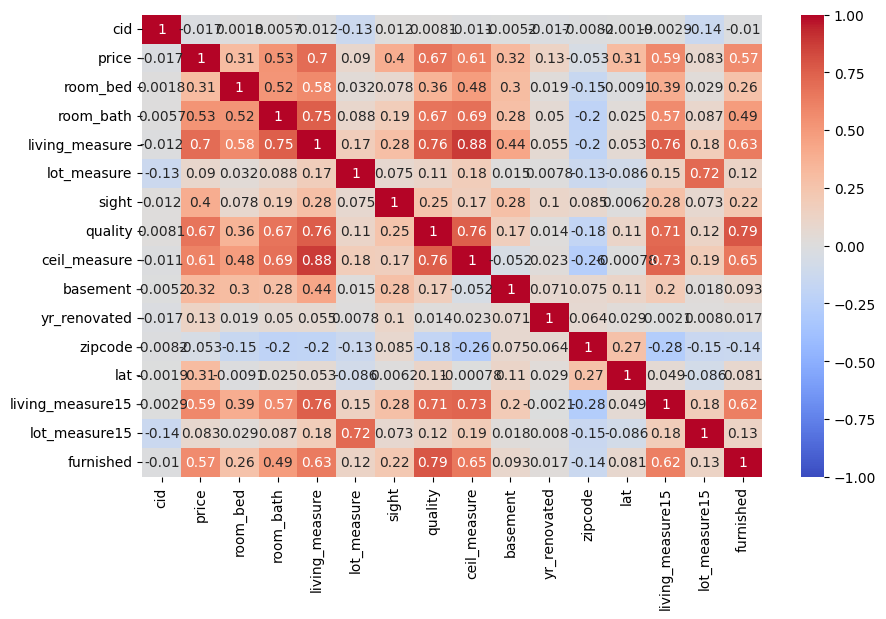

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(Data.corr(), vmin=-1, vmax=1, cmap="coolwarm", annot=True)
plt.show()

In [ ]:
#Let's create another dataframe for modeling
df_model=Data.copy()

In [ ]:
#Dropping the feature not required in 1st Iteration
df_final=df_model.drop(['cid','dayhours','yr_renovated','zipcode','lat'],axis=1)

In [ ]:
# Getting dummies for columns ceil, coast, sight, condition, quality, yr_renovated, furnished
dff = pd.get_dummies(df_final, columns=['room_bed','room_bath',],drop_first=True)

In [ ]:
dff.head()

price  living_measure  lot_measure ceil coast  sight condition  quality  \
0  600000          3050.0       9440.0    1     0    0.0         3      8.0   
1  190000           670.0       3101.0    1     0    0.0         4      6.0   
2  735000          3040.0       2415.0    2     1    4.0         3      8.0   
3  257000          1740.0       3721.0    2     0    0.0         3      8.0   
4  450000          1120.0       4590.0    1     0    0.0         3      7.0   

   ceil_measure  basement  ... room_bath_5.25 room_bath_5.5  room_bath_5.75  \
0        1800.0    1250.0  ...              0             0               0   
1         670.0       0.0  ...              0             0               0   
2        3040.0       0.0  ...              0             0               0   
3        1740.0       0.0  ...              0             0               0   
4        1120.0       0.0  ...              0             0               0   

   room_bath_6.0  room_bath_6.25 room_bath_6.5  room_bath_6.75  room_bath_7.5  \
0              0               0             0               0              0   
1              0               0             0               0              0   
2              0               0             0               0              0   
3              0               0             0               0              0   
4              0               0             0               0              0   

   room_bath_7.75  room_bath_8.0  
0               0              0  
1               0              0  
2               0              0  
3               0              0  
4               0              0  

[5 rows x 57 columns]

In [ ]:
#Creating X, y for training and testing set
X = dff.drop("price" , axis=1)
y = dff["price"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=10)

In [ ]:
#importing the necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
for i in Data.columns:
  if i in ['room_bed','room_bath','ceil','coast','sight','condition','quality','zipcode','furnished','base','renovated']:
    Data[i]=Data[i].apply(str)

In [ ]:
cat=['room_bed','room_bath','ceil','coast','sight','condition','quality','zipcode','furnished','base','renovated']
cont=['dayhours','price','living_measure','lot_measure','ceil_measure','basement','yr_built','yr_renovated','lat','long','living_measure15','lot_measure15','total_area']

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21613 non-null  object 
 4   room_bath         21613 non-null  object 
 5   living_measure    21613 non-null  float64
 6   lot_measure       21613 non-null  float64
 7   ceil              21613 non-null  object 
 8   coast             21613 non-null  object 
 9   sight             21613 non-null  object 
 10  condition         21613 non-null  object 
 11  quality           21613 non-null  object 
 12  ceil_measure      21613 non-null  float64
 13  basement          21613 non-null  float64
 14  yr_built          21613 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  object

In [ ]:
for i in cat:
  print(i,Data[i].nunique())

In [ ]:
df_mod=pd.get_dummies(Data,drop_first=True)

In [ ]:
df_out=pd.DataFrame()

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Ridge, Lasso

In [ ]:
lr=LinearRegression()
x=Data.drop(['price'],1)
y=Data.price
x=pd.get_dummies(x,drop_first=True)
n,p=x.shape
kfold = model_selection.KFold(n_splits=10, random_state=100 , shuffle=True)
results = model_selection.cross_val_score(lr, x, y, cv=kfold)
results.mean(),results.var(),1-((1-results.mean())*(n-1)/(n-p-1))

<ipython-input-56-0b1a05c778c4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=Data.drop(['price'],1)
